In [1]:
import pandas as pd
import numpy as np
import cv2
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from IPython import display

In [2]:
#reading the csv dataset
df = pd.read_csv("train.csv")

In [3]:
#printing the first five rows from the csv dataset
df.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [4]:
#displaying the different types of classnames present in the dataset
print(df.shape,'\n')
print(df['classname'].value_counts(),'\n')
print(df.info())

(15412, 6) 

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15412 entries, 0 to 15411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       15412 non-null  object
 1   x1         15412 non-null  int64 
 2   x2         15412 non-null 

In [5]:
#checking for missing values in the csv dataset
df.isnull().sum()

name         0
x1           0
x2           0
y1           0
y2           0
classname    0
dtype: int64

In [6]:
json_data ="C:\\Users\\pruth\\Desktop\\ML_Project\\archive\\Medical mask\\Medical mask\\Medical Mask\\annotations"

In [7]:
images ="C:\\Users\\pruth\\Desktop\\ML_Project\\archive\\Medical mask\\Medical mask\\Medical Mask\\images"

In [8]:
def getJSON(filePathandName):
    with open(filePathandName,'r') as f:
        return json.load(f)

In [9]:
jsonfiles= []
for i in os.listdir(json_data):
    jsonfiles.append(getJSON(os.path.join(json_data,i)))
jsonfiles[0]

{'FileName': '1801.jpg',
 'NumOfAnno': 1,
 'Annotations': [{'isProtected': False,
   'ID': 924868908868875136,
   'BoundingBox': [451, 186, 895, 697],
   'classname': 'face_no_mask',
   'Confidence': 1,
   'Attributes': {}}]}

C:\Users\pruth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

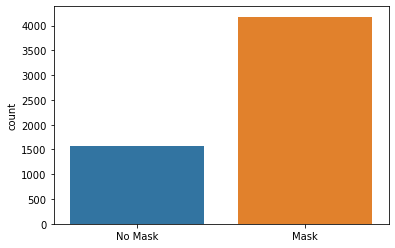

In [10]:
data = []
image_size = 124
labels={'mask':0,'without mask':1}
for i in df["name"].unique():
    f = i+".json"
    for j in getJSON(os.path.join(json_data,f)).get("Annotations"):
        if j["classname"] in ["face_with_mask"]:
            x,y,w,h = j["BoundingBox"]
            image = cv2.imread(os.path.join(images,i),1)
            image = image[y:h,x:w]
            image = cv2.resize(image,(image_size,image_size))
            data.append([image,labels["mask"]])
        if j["classname"] in ["face_no_mask"]:
            x,y,w,h = j["BoundingBox"]
            image = cv2.imread(os.path.join(images,i),1)
            image = image[y:h,x:w]
            image = cv2.resize(image,(image_size,image_size))    
            data.append([image,labels["without mask"]])
random.shuffle(data)

p = []
for face in data:
    if(face[1] == 0):
        p.append("Mask")
    else:
        p.append("No Mask")
sns.countplot(p)

In [11]:
a=os.listdir(images)
b=os.listdir(json_data)
a.sort()
b.sort()

In [12]:
print(len(a),len(a))

6024 6024


In [13]:
image

array([[[178, 185, 194],
        [179, 186, 195],
        [179, 186, 195],
        ...,
        [183, 190, 193],
        [183, 190, 193],
        [184, 188, 190]],

       [[180, 187, 196],
        [180, 187, 196],
        [179, 186, 195],
        ...,
        [182, 189, 192],
        [182, 190, 190],
        [182, 190, 192]],

       [[179, 186, 195],
        [179, 186, 195],
        [178, 185, 193],
        ...,
        [182, 189, 191],
        [182, 190, 190],
        [184, 188, 190]],

       ...,

       [[  6,  11,  12],
        [  6,  10,  11],
        [  5,   9,  10],
        ...,
        [ 16,  19,  23],
        [ 19,  19,  18],
        [ 16,  17,  14]],

       [[  5,  11,  12],
        [  6,  10,  11],
        [  6,  10,  11],
        ...,
        [ 15,  17,  21],
        [ 18,  18,  18],
        [ 18,  18,  18]],

       [[  6,   9,  10],
        [  8,   7,   9],
        [  9,   7,  10],
        ...,
        [ 17,  20,  23],
        [ 15,  14,  14],
        [ 14,  14,  14]]

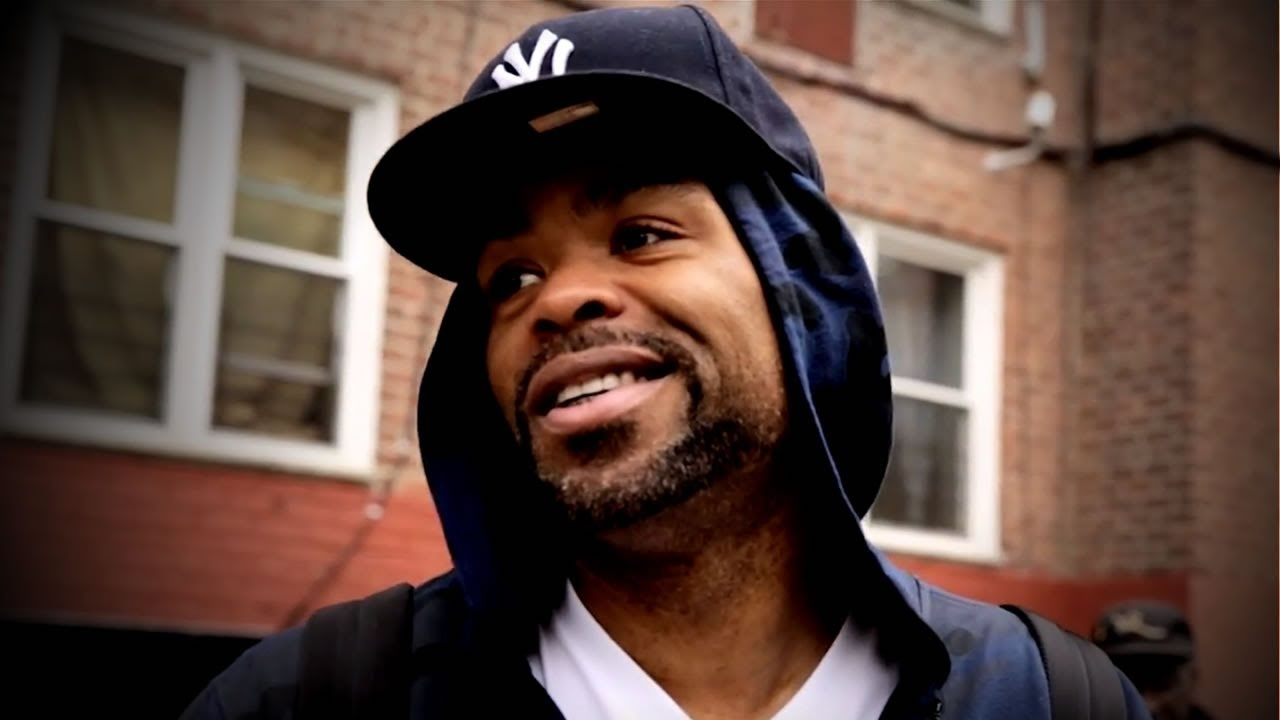

In [14]:
img1 = display.Image("C:\\Users\\pruth\\Desktop\\ML_Project\\archive\\Medical mask\\Medical mask\\Medical Mask\\images\\0001.jpg",width = '200', height = '200')
img2 = display.Image("C:\\Users\\pruth\\Desktop\\ML_Project\\archive\\Medical mask\\Medical mask\\Medical Mask\\images\\0003.jpg",width = '200', height = '200')
img1 


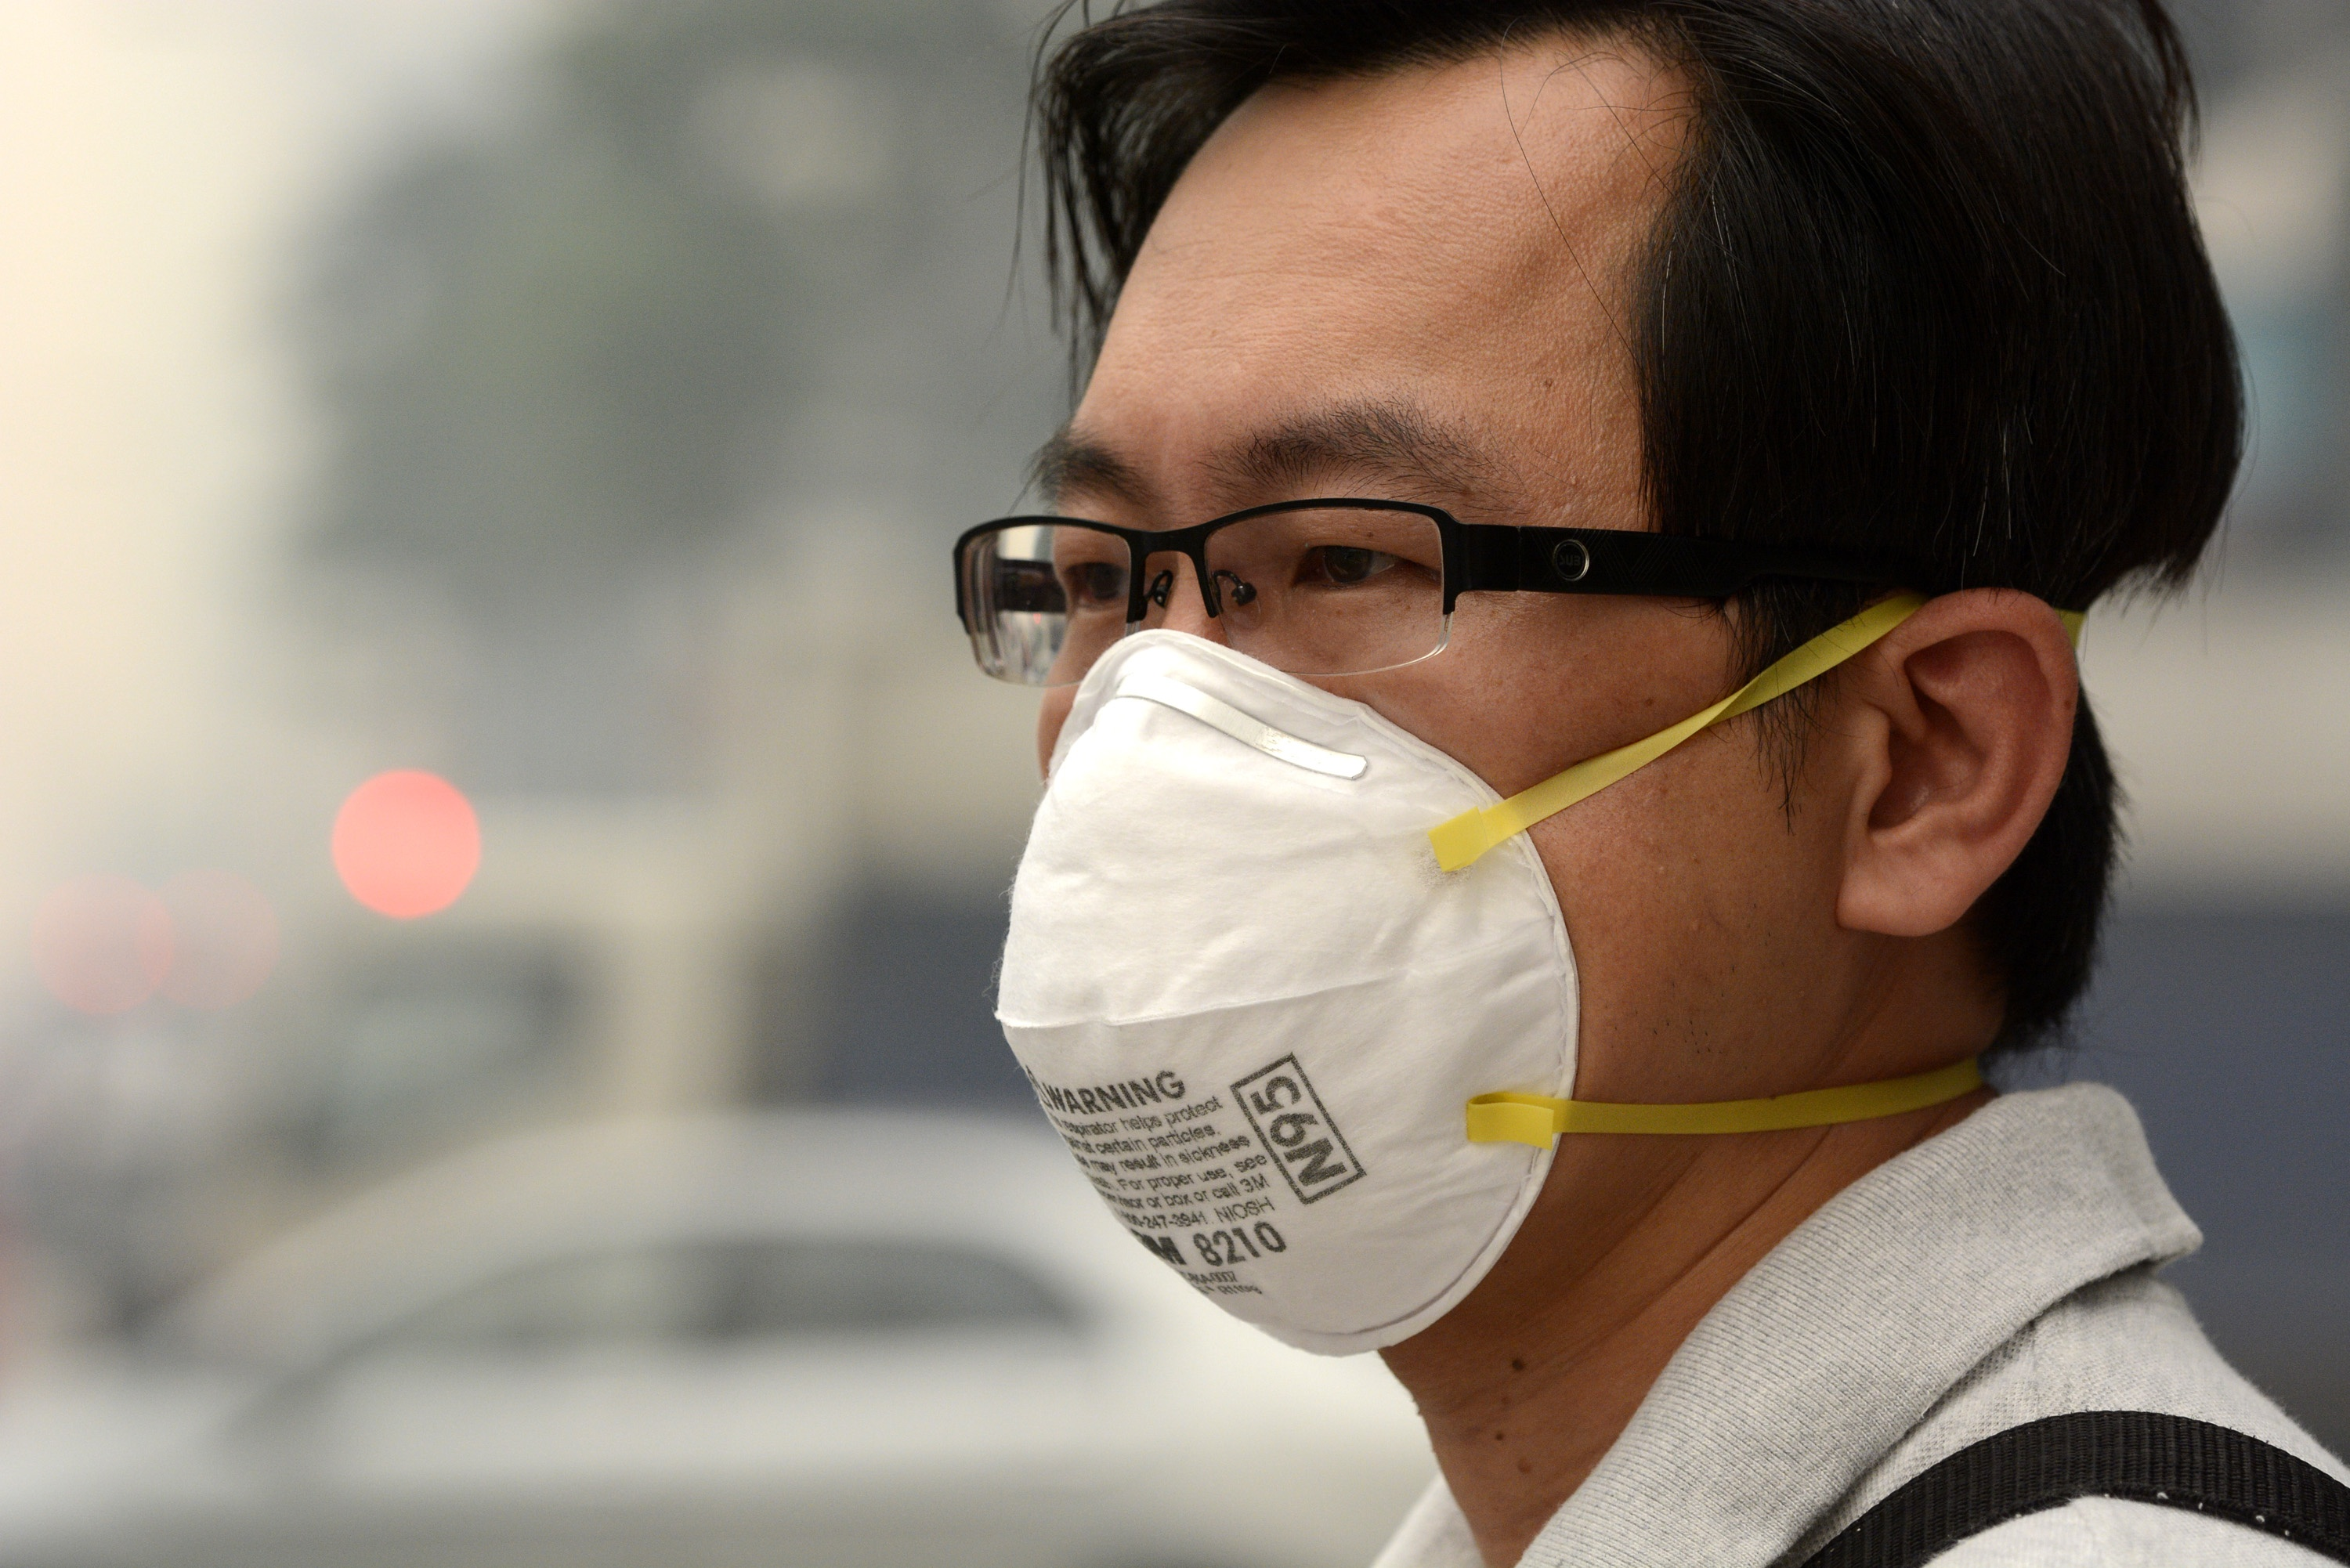

In [15]:
img2

In [16]:
X = []
Y = []
for features,label in data:
    X.append(features)
    Y.append(label)

X = np.array(X)/255.0
X = X.reshape(-1,124,124,3)
Y = np.array(Y)

In [17]:
train_images=a[1698:]
test_images=a[:1698]

In [18]:
bbox=[]
for i in range(len(df)):
    arr_temp=[]
    for j in df.iloc[i][["x1",'x2','y1','y2']]:
        arr_temp.append(j)
    bbox.append(arr_temp)
df["bbox"]=bbox  
def get_boxes(id):
    boxes=[]
    for i in df[df["name"]==str(id)]["bbox"]:
        boxes.append(i)
    return boxes
print(get_boxes(train_images[25]))


[[477, 186, 677, 418], [156, 191, 375, 414], [189, 277, 370, 408]]


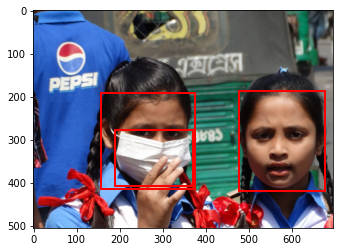

In [19]:
import matplotlib.patches as patches
image_temp=train_images[25]
img_test=plt.imread(os.path.join(images,image_temp))
fig,ax = plt.subplots(1)
ax.imshow(img_test)
boxes=get_boxes(image_temp)
for box in boxes:
    rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=2,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()

In [20]:
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator


In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(124,124,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam' ,metrics=['accuracy'])
xtrain,xval,ytrain,yval=train_test_split(X, Y,train_size=0.8,random_state=0)
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,    
        rotation_range=15,    
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)
datagen.fit(xtrain)



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [24]:
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),
                    steps_per_epoch=xtrain.shape[0]//32,
                    epochs=50,
                    verbose=1,
                    validation_data=(xval, yval))

C:\Users\pruth\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
143/143 [==============================] - 56s 388ms/step - loss: 0.3613 - accuracy: 0.8377 - val_loss: 0.2757 - val_accuracy: 0.8800
Epoch 2/50
143/143 [==============================] - 56s 390ms/step - loss: 0.2775 - accuracy: 0.8855 - val_loss: 0.2751 - val_accuracy: 0.8887
Epoch 3/50
143/143 [==============================] - 55s 383ms/step - loss: 0.2665 - accuracy: 0.8940 - val_loss: 0.2576 - val_accuracy: 0.8939
Epoch 4/50
143/143 [==============================] - 53s 371ms/step - loss: 0.2564 - accuracy: 0.8964 - val_loss: 0.2005 - val_accuracy: 0.9130
Epoch 5/50
143/143 [==============================] - 54s 376ms/step - loss: 0.2228 - accuracy: 0.9089 - val_loss: 0.2026 - val_accuracy: 0.9270
Epoch 6/50
143/143 [==============================] - 54s 378ms/step - loss: 0.2207 - accuracy: 0.9085 - val_loss: 0.2113 - val_accuracy: 0.9148
Epoch 7/50
143/143 [==============================] - 57s 397ms/step - loss: 0.2192 - accuracy: 0.9113 - val_loss: 0.1809 - val_ac

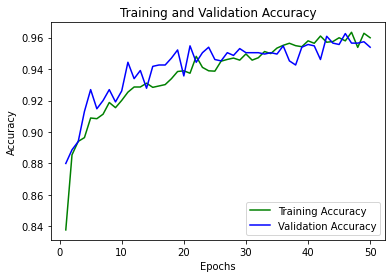

In [25]:
acc_train = history.history['accuracy']
acc_val=history.history['val_accuracy']
epochs=range(1,51)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

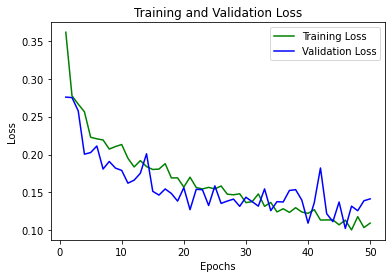

In [26]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,51)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
model.layers

In [28]:
import cv2 as cv
caffeModel = "C:\\Users\\pruth\\Desktop\\ML_Project\\archive\\models\\res10_300x300_ssd_iter_140000.caffemodel"
prototextPath = "C:\\Users\\pruth\\Desktop\\ML_Project\\archive\\models\\deploy.prototxt"
cvNet = cv.dnn.readNetFromCaffe(prototextPath,caffeModel)

In [29]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)])
    return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))

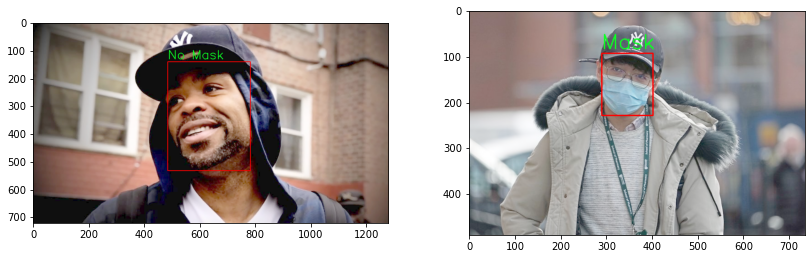

In [32]:
import cv2 as cv
#test_images = ['1114.png','1504.jpg', '0072.jpg','0012.jpg','0353.jpg','1374.jpg']
test_images = ['0001.jpg','0027.jpg']
img_size = 124
gamma = 2.0
fig = plt.figure(figsize = (14,14))
rows = 3
cols = 2
axes = []
assign = {'0':'Mask','1':"No Mask"}
for j,im in enumerate(test_images):
    image =  cv2.imread(os.path.join(images,im),1)
    image =  adjust_gamma(image, gamma=gamma)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300,300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    cvNet.setInput(blob)
    detections = cvNet.forward()
    for i in range(0, detections.shape[2]):
    
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            frame = image[startY:endY, startX:endX]
            im = cv2.resize(frame,(img_size,img_size))
            im = np.array(im)/255.0
            im = im.reshape(1,124,124,3)
            result = model.predict(im)
            if result>0.5:
                label_Y = 1
            else:
                label_Y = 0
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
            cv2.putText(image,assign[str(label_Y)] , (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (36,255,12), 2)
        
        
    axes.append(fig.add_subplot(rows, cols, j+1))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
model.save('my_model.h5')